   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

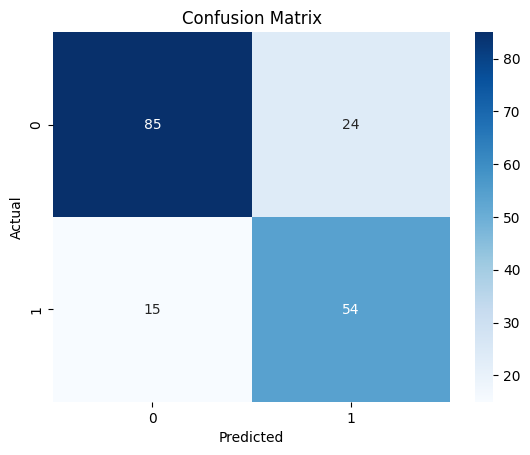

      Feature  Coefficient
6  embarked_C     0.201864
7  embarked_Q     0.100585
5        fare     0.001722
2         age    -0.043179
4       parch    -0.053650
8  embarked_S    -0.301365
3       sibsp    -0.375142
0      pclass    -1.119557
1         sex    -2.634148


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns              #titanic dataset from seaborn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
titanic=sns.load_dataset("titanic")
print(titanic.head())

titanic.info()
print(titanic.isnull().sum())

#fill the age with median
titanic['age']=titanic['age'].fillna(titanic['age'].median())

#fill embarked in mode
titanic['embarked']=titanic['embarked'].fillna(titanic['embarked'].mode()[0])

#drop deck(as too much missing values)
titanic=titanic.drop(columns=['deck'])

#drop rows where embark_town is missing
titanic=titanic.dropna(subset=['embark_town'])

encoder=LabelEncoder()

#encode sex
titanic['sex']=encoder.fit_transform(titanic['sex'])

#encode embarked
titanic=pd.get_dummies(titanic, columns=['embarked'])

print(titanic.head())

# define target and future
x = titanic.drop(columns=['survived', 'who', 'adult_male', 'alive', 'alone', 'embark_town', 'class'])
y=titanic['survived']

# Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Initialize model
log_reg = LogisticRegression(max_iter=1000)  # increase max_iter if convergence warning appears

# Train model
log_reg.fit(x_train, y_train)

#predict
y_pred = log_reg.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# classification report
print(classification_report(y_test, y_pred))


# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)